# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *main.main.chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

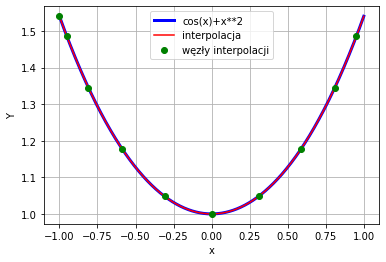

In [2]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("Y")
plt.legend(loc = 0)
plt.grid()
plt.show()

noema main.L_inf dla 10 =  0.05921929501962803
obliczenie dla rzędu 10 trwały 0.007977724075317383 s
noema main.L_inf dla 100 =  0.0059656768638050904
obliczenie dla rzędu 100 trwały 0.01894831657409668 s
noema main.L_inf dla 1000 =  0.0005737874274164482
obliczenie dla rzędu 1000 trwały 0.13164758682250977 s
noema main.L_inf dla 10000 =  8.185222388809154e-06
obliczenie dla rzędu 10000 trwały 1.2563374042510986 s
noema main.L_inf dla 100000 =  7.949825862690017e-08
obliczenie dla rzędu 100000 trwały 12.325388431549072 s


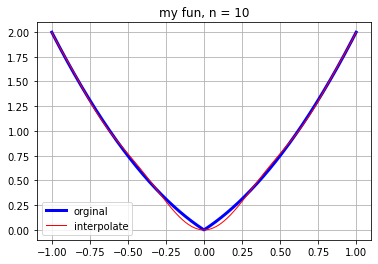

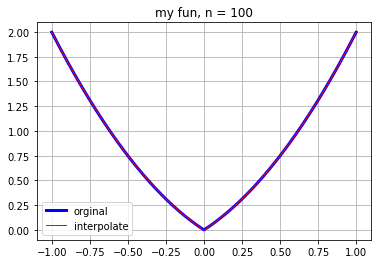

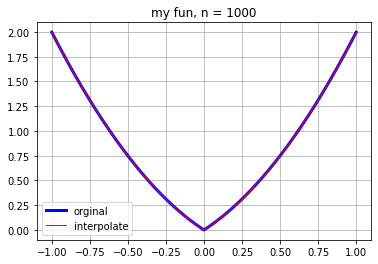

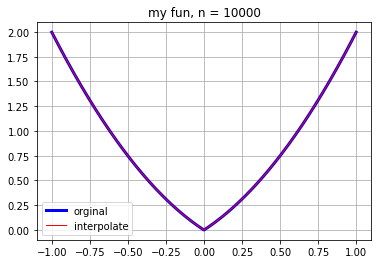

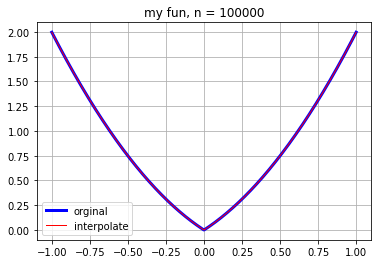

In [3]:
# ZADANIE 3, 4
from time import time
f_2_i = main.f1
for n in [10,100,1000,10000,100000]:
    start = time()

    wagi = main.bar_czeb_weights(n)
    nodes = main.chebyshev_nodes(n)
    values = np.array([f_2_i(x) for x in nodes])
    xs = np.linspace(-0.999, 0.999, 1000)
    true_vals = np.array([f_2_i(x) for x in xs])

    f1_interp_values = main.barycentric_inte(nodes, values, wagi, xs)

    end = time()
    print(f'noema main.L_inf dla {n} = ', main.L_inf(true_vals, f1_interp_values))
    print(f'obliczenie dla rzędu {n} trwały {end-start} s')

    # main.f2_interp_values = barycentric_interpolate(nodes,values,xs)

    plt.figure()
    plt.plot(xs, true_vals,'b',label='orginal',linewidth=3)
    plt.plot(xs,f1_interp_values,'r', linewidth=1,label='interpolate')
    plt.title(f"my fun, n = {n}")
    plt.legend(loc=0)
    plt.grid('on')


    # plt.figure()
    # # plt.plot(nodes, values)
    # plt.plot(xs, main.f2_interp_values)
    # plt.title(f"bar in numpy, n = {n}")

    plt.show()

Okazuje sie że wbudowana funkcja numpy baricentric_interpolate działa kiepsko - uświadomiło mi to że nie można bezgranicznie ufać wbudowanym funkcjom nawet tak porządnego modułu jak nympy

***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

In [4]:
# ZADANIE 5
# jednokrotnie - main.f2
# trzykrotnie - main.f3
machine_zero = main.epsilon()
# TODO ile ten błąd wynosi
print('machine zero = ', machine_zero)
for f_2_i, l_poch in [[main.f3, 3], [main.f2, 1]]:
    n_s = []
    n_v = []
    norm_s = []
    for n in np.ceil(np.logspace(2,10)).astype(int):
        print(n)
        n = int(n)
        wagi = main.bar_czeb_weights(n)
        # print('wagi done')
        nodes = main.chebyshev_nodes(n)
        # print('node done')
        values = np.array(f_2_i(nodes))
        # print('n vals done')
        xs = np.linspace(-1+1e-5, 1-1e-5, 1001)
        # print('t x done')
        true_vals = np.array(f_2_i(xs))
        # print('t y done')
        f1_interp_values = main.barycentric_inte(nodes, values, wagi, xs)
        # print('interp done')
        norma = main.L_inf(true_vals, f1_interp_values)
        # print('norma done')
        norm_s.append(norma)
        n_s.append(n)
        n_v.append(n**-l_poch)
        print(norma)
        if main.L_inf(true_vals, f1_interp_values) <= 20*2.55351295663786e-15:
            break
    plt.figure()
    plt.plot(n_s, norm_s, '.')
    plt.plot(n_s, n_v, 'r-')
    plt.xscale('log')
    plt.legend(['błąd','oszacowanie'])
    plt.yscale('log')
    plt.grid('on')
    plt.show()

print('finish')

machine zero =  1.1102230246251565e-16
100
0.0001415594233979839
146
4.780711248008284e-05
213
3.1927306720705774e-05
309
1.0385922286566234e-05
450
1.4632033706508059e-06
656
4.2770383569858554e-07
955
3.5243172078256165e-07
1390
4.243130456405978e-08
2024
1.2659275684288986e-08
2948
1.990958990962229e-09
4292
1.2317892076036308e-09
6251
1.2632018856868676e-09
9103
4.086778240634595e-10
13258
2.5244720176832338e-11
19307
4.2862998718162544e-11
28118
2.373405151984132e-13
40950
1.0738033333292629e-13
59637
1.4543002385804682e-12
86852


KeyboardInterrupt: 

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

In [ ]:
print("start")
i = 1j

for f_2_i, pierw in [[main.f4_1,i], [main.f4_25,i/5], [main.f4_100,i/10]]:
    n_s = []
    norm_s = []
    xs = np.linspace(-1+1e-5, 1-1e-5, 1001)
    true_vals = np.array(f_2_i(xs))
    for n in range(10,600,5):
        n = int(n)
        # print('n:', n)
        wagi = main.bar_czeb_weights(n)
        nodes = main.chebyshev_nodes(n)
        values = np.array(f_2_i(nodes))

        f1_interp_values = main.barycentric_inte(nodes, values, wagi, xs)
        norma = main.L_inf(true_vals, f1_interp_values)
        norm_s.append(norma)
        n_s.append(n)
        # print('norma:', norma)
        if main.L_inf(true_vals, f1_interp_values) < 2*2.55351295663786e-15:
            break

    pierwiastki = [-pierw, pierw]
    maxx = max(true_vals)
    b = abs(pierw)-1e-6
    a = np.sqrt(1+b**2)
    rho = a+b
    M = f_2_i(b*i)
    # print('M:',M)
    oszac = [4. * abs(np.real(M)) * rho**(-x)/(rho-1) for x in n_s]
    # TODO nie działa dokładnie
    plt.figure()
    plt.plot(n_s, norm_s,'.')
    plt.plot(n_s, oszac)
    plt.legend(['norma','oszacowanie'])
    plt.xlabel('n')
    plt.yscale('log')
    plt.show()


print('finish')

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

In [ ]:
#Zadanie 7
gibbs = main.f5

#X=np.linspace(-1+1e-5,1-1e-5,1001)
X = np.linspace(-1e-2, 1e-2, 1001)


il = (1000-900)/2
for tryb in ('parzystych','nieparzystych'):
    a = 0
    blad_parz = 0
    if tryb == 'nieparzystych':
        a = 1
    for N in range(900+a, 1001+a, 2):
        x_i=main.chebyshev_nodes(N)
        y_i=gibbs(x_i)
        w_i=main.bar_czeb_weights(N)
        w_i[0]=0.5
        w_i[N]=0.5*(-1)**N
        Y= main.barycentric_inte(x_i,y_i,w_i,X)
        true_vals = gibbs(X)
        blad_parz += main.L_inf(Y, true_vals)
    plt.figure()
    plt.plot(X, gibbs(X))
    plt.plot(X, Y)
    plt.xlabel('$k$')
    plt.ylabel('$||f-p||$')
    plt.xticks([-.01,0,.01])
    plt.yticks([np.amin(Y),0,np.amax(Y, axis=None)])
    plt.title(f'Efekt Gibbsa dla {tryb}')
    plt.show()
    print(f"norma dla {tryb} = {blad_parz/il}")
    # TODO dokończyć - dlaczego parzyste inne

Różnica może brać się z tego że nieparzyste mają wenzeł czybyszewa w 0 a nieparzyste nie. Powoduje to że błąd dla parzystych to ok.2 a dla parzystych ok. 2/2 czyli ok 1.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)